In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import load
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import skill_metrics as sm

In [4]:
X_test = pd.read_csv('data/train_test/X_test.csv')
y_test = pd.read_csv('data/train_test/y_test.csv').squeeze()

In [5]:
pipeline_rf = load('models/random_forest_pipeline.joblib')
pipeline_xgb = load('models/xgboost_pipeline.joblib')

In [ ]:
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_xgb = pipeline_xgb.predict(X_test)

[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.8s finished


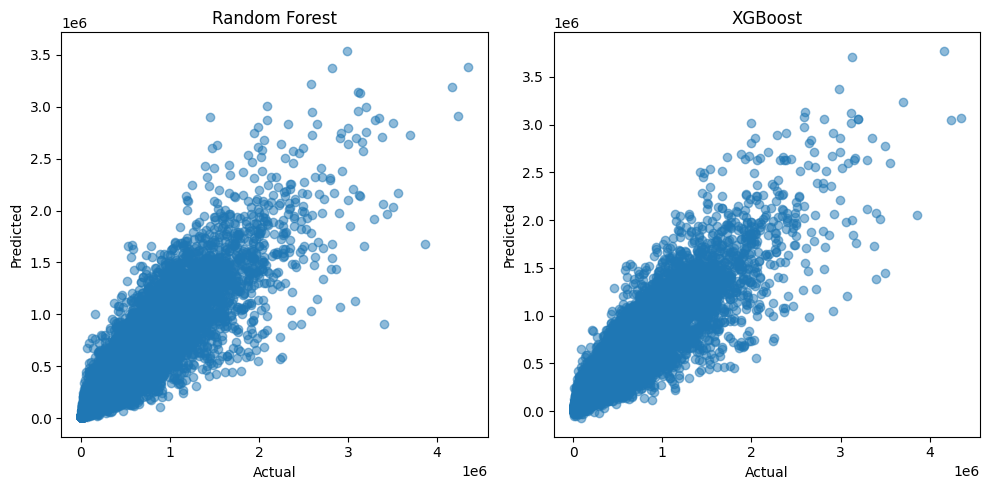

In [7]:
# Plot pred vs actual
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', lw=2)
plt.title('Random Forest')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', lw=2)
plt.title('XGBoost')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.tight_layout()
plt.show()

In [8]:
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = 100 * np.mean(np.abs((y_true - y_pred) / y_true))
    
    print(f"\n{model_name} Performance:")
    print(f"R²: {r2:.4f}, MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")
    
    return {"R2": r2, "MAE": mae, "RMSE": rmse, "MAPE": mape}

# Evaluate both models
metrics_rf = evaluate_model(y_test, y_pred_rf, "Random Forest")
metrics_xgb = evaluate_model(y_test, y_pred_xgb, "XGBoost")



Random Forest Performance:
R²: 0.8680, MAE: 41994.71, RMSE: 86034.32, MAPE: 23.25%

XGBoost Performance:
R²: 0.8758, MAE: 41613.75, RMSE: 83446.25, MAPE: 23.38%


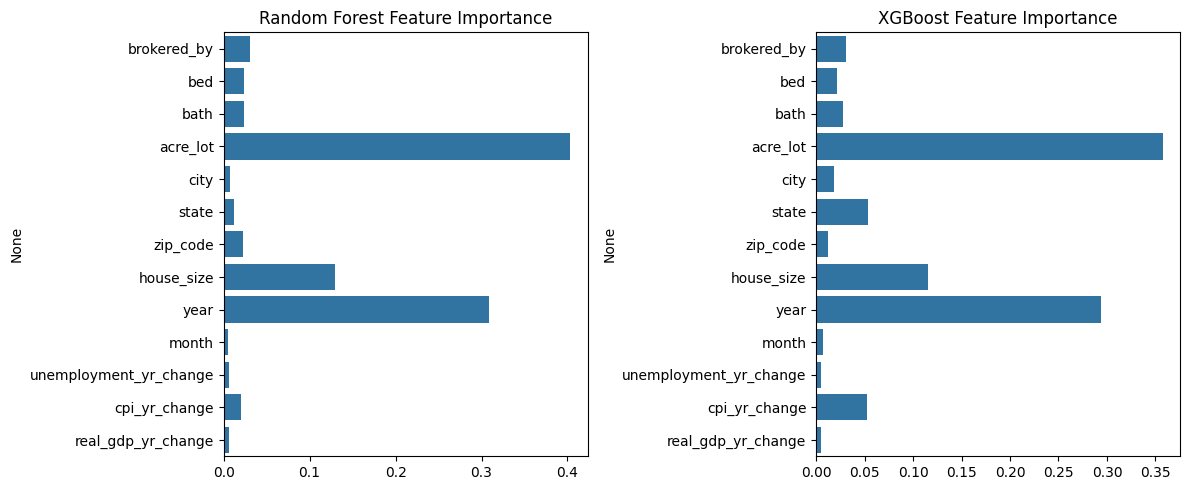

In [9]:
rf_importance = pipeline_rf.named_steps["model"].feature_importances_
xgb_importance = pipeline_xgb.named_steps["model"].feature_importances_
feature_names = X_test.columns

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.barplot(x=rf_importance, y=feature_names)
plt.title("Random Forest Feature Importance")

plt.subplot(1, 2, 2)
sns.barplot(x=xgb_importance, y=feature_names)
plt.title("XGBoost Feature Importance")

plt.tight_layout()
plt.show()

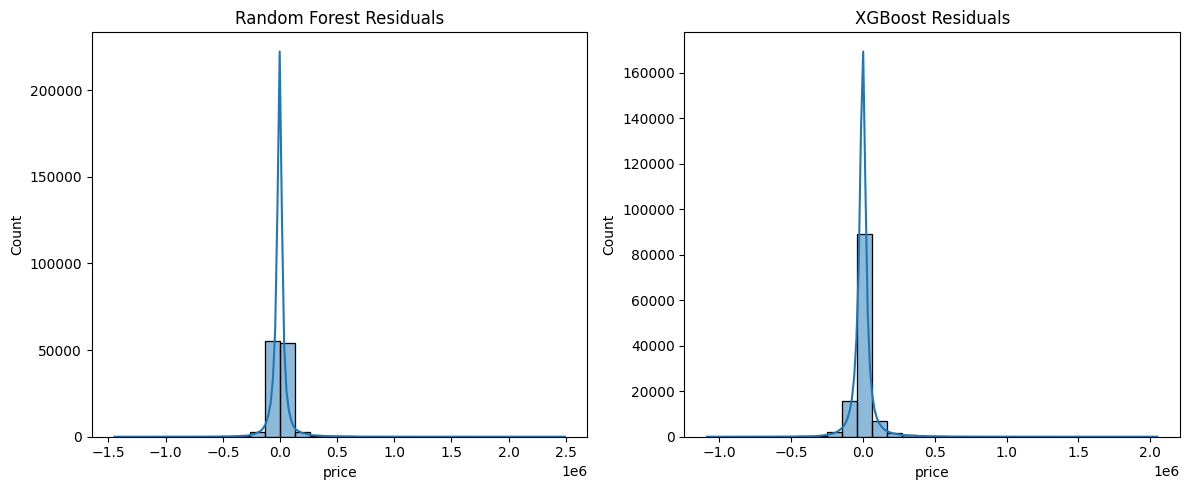

In [10]:
residuals_rf = y_test - y_pred_rf
residuals_xgb = y_test - y_pred_xgb

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(residuals_rf, kde=True, bins=30)
plt.title("Random Forest Residuals")

plt.subplot(1, 2, 2)
sns.histplot(residuals_xgb, kde=True, bins=30)
plt.title("XGBoost Residuals")

plt.tight_layout()
plt.show()

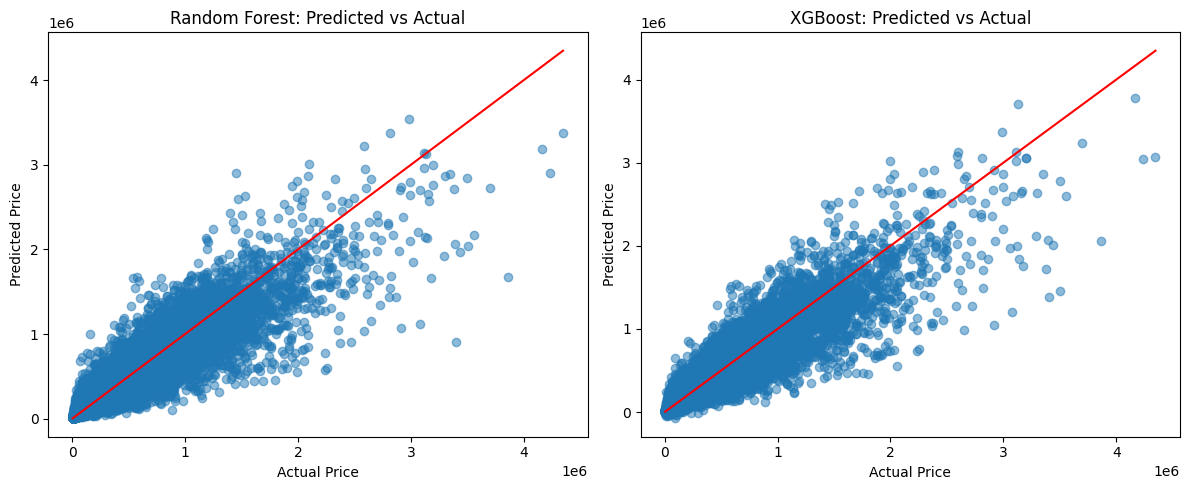

In [11]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.title("Random Forest: Predicted vs Actual")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red")
plt.title("XGBoost: Predicted vs Actual")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")

plt.tight_layout()
plt.show()

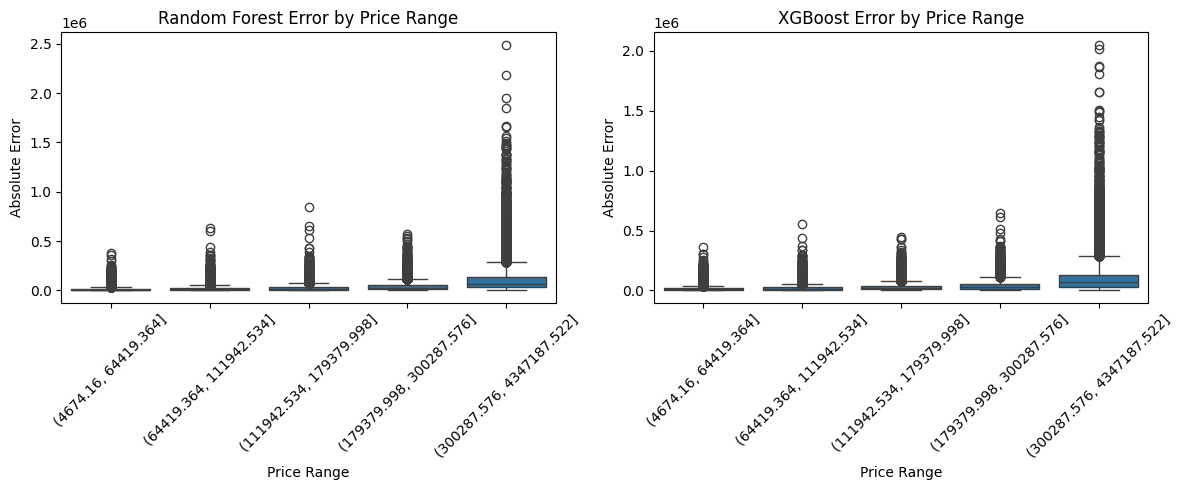

In [12]:
X_test["actual_price"] = y_test
X_test["error_rf"] = np.abs(y_test - y_pred_rf)
X_test["error_xgb"] = np.abs(y_test - y_pred_xgb)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=pd.qcut(X_test["actual_price"], q=5), y=X_test["error_rf"])
plt.xticks(rotation=45)
plt.title("Random Forest Error by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Absolute Error")

plt.subplot(1, 2, 2)
sns.boxplot(x=pd.qcut(X_test["actual_price"], q=5), y=X_test["error_xgb"])
plt.xticks(rotation=45)
plt.title("XGBoost Error by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Absolute Error")

plt.tight_layout()
plt.show()

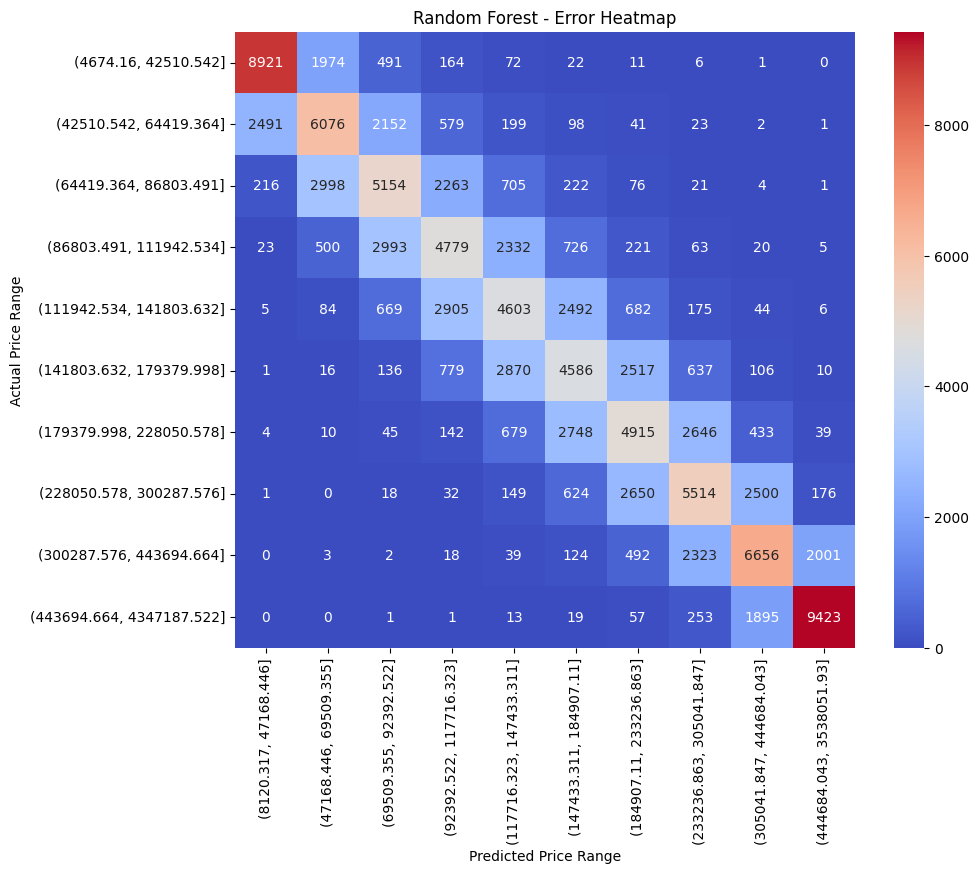

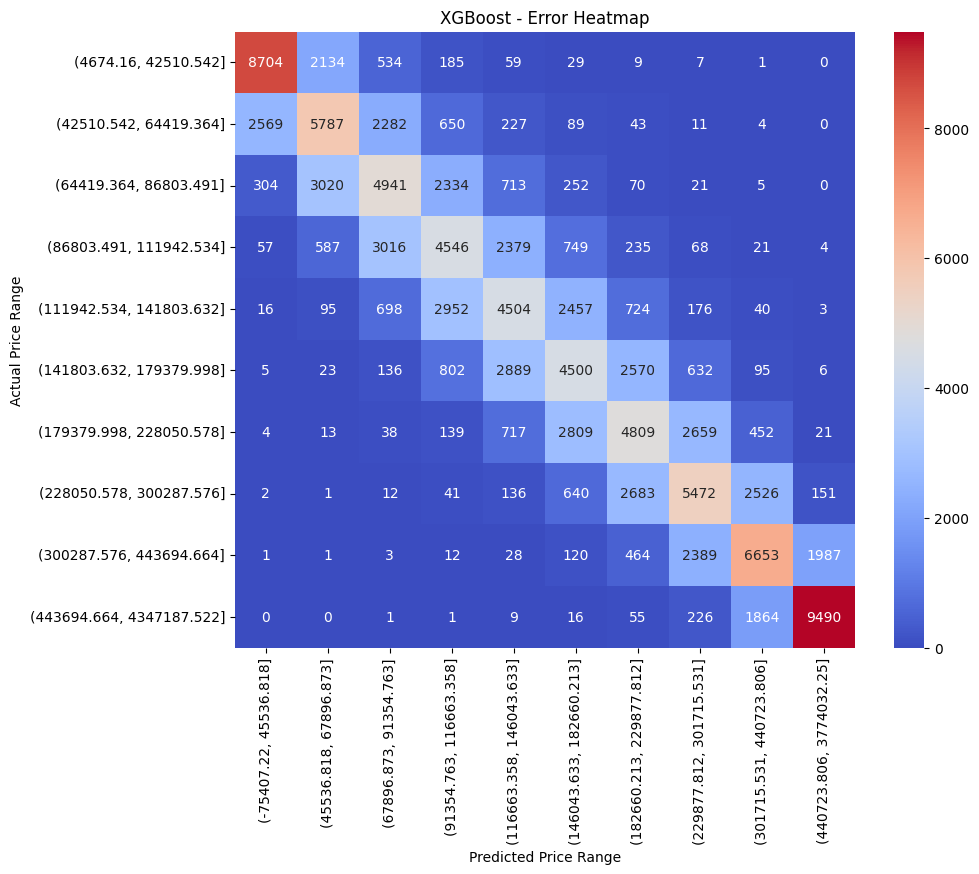

In [13]:
def plot_error_heatmap(y_true, y_pred, model_name):
    df = pd.DataFrame({"Actual": y_true, "Predicted": y_pred})
    
    # Create bins
    df["Actual Bin"] = pd.qcut(df["Actual"], q=10)  # Divide actual values into 10 bins
    df["Predicted Bin"] = pd.qcut(df["Predicted"], q=10)  # Divide predicted values into 10 bins
    
    # Create heatmap matrix
    heatmap_data = pd.crosstab(df["Actual Bin"], df["Predicted Bin"])
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm")
    plt.xlabel("Predicted Price Range")
    plt.ylabel("Actual Price Range")
    plt.title(f"{model_name} - Error Heatmap")
    plt.show()

# Generate heatmaps for both models
plot_error_heatmap(y_test, y_pred_rf, "Random Forest")
plot_error_heatmap(y_test, y_pred_xgb, "XGBoost")


/home/essa/ing_housing/.venv/lib/python3.12/site-packages/skill_metrics/taylor_diagram.py:360: RuntimeWarning: invalid value encountered in arccos
  rho, theta = STDs, np.arccos(CORs)


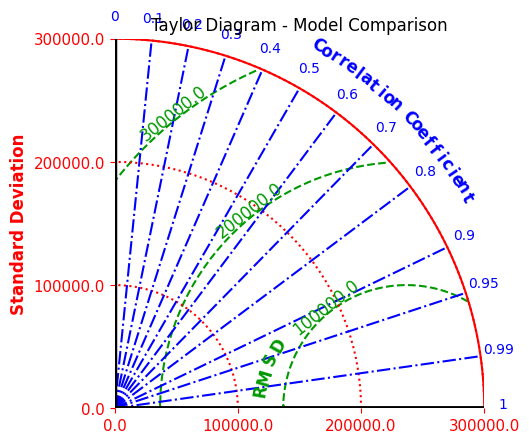

In [14]:
def calculate_taylor_statistics(y_true, y_preds, model_names):
    """Calculate statistics required for Taylor Diagram: STD, Correlation, CRMSE."""
    y_true = np.array(y_true).flatten()
    
    stats = []
    for y_pred, name in zip(y_preds, model_names):
        y_pred = np.array(y_pred).flatten()

        # Standard Deviation (σ)
        std_pred = np.std(y_pred).astype(float)

        # Correlation Coefficient (R)
        correlation = np.corrcoef(y_true, y_pred)[0, 1]

        # Centered Root Mean Square Error (CRMSE)
        crmse = np.sqrt(np.mean((y_pred - y_true - np.mean(y_pred - y_true)) ** 2)).astype(float)

        stats.append((std_pred, correlation, crmse, name))

    return stats

# Compute statistics for Random Forest & XGBoost
model_names = ["Random Forest", "XGBoost"]
y_preds = [y_pred_rf, y_pred_xgb]
taylor_stats = calculate_taylor_statistics(y_test, y_preds, model_names)

# Convert values to float to avoid type issues
stds = np.array([np.std(y_test)] + [stat[0] for stat in taylor_stats], dtype=float)
cors = np.array([1] + [stat[1] for stat in taylor_stats], dtype=float)
crmses = np.array([0] + [stat[2] for stat in taylor_stats], dtype=float)
labels = ["Actual"] + [stat[3] for stat in taylor_stats]

# Generate Taylor Diagram
sm.taylor_diagram(stds, cors, crmses, markerLabel=labels, colCOR='blue', colSTD='red', alpha=0.7)

plt.title("Taylor Diagram - Model Comparison")
plt.show()